This notebook contains data cleaning and EDA. 

### Cleaning

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importing playlist data
songs=pd.read_csv('Capstone/Data/playlist_data.csv')
songs.head(2)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,release_date,artist_id,genres
0,Mobb Deep,The Infamous,Survival of the Fittest,7N1Vjtzr1lmmCW9iasQ8YO,0.813,0.703,11,-5.077,0,0.268,0.000001,0.237,0.241,94.828,224533,4,75,1995-04-25,6O2zJ0tId7g07yzHtX0yap,"['east coast hip hop', 'hardcore hip hop', 'hi..."
1,Nas,Illmatic,Represent,6DPrhGVJ1WTZvM9fKptnGe,0.708,0.832,1,-4.964,1,0.318,0.000003,0.189,0.618,92.428,252600,4,76,1994-04-19,20qISvAhX20dpIbOOzGK3q,"['conscious hip hop', 'east coast hip hop', 'g..."


In [3]:
#checking for null values
songs.isnull().sum()

artist              0
album               0
track_name          0
track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
popularity          0
release_date        0
artist_id           3
genres              3
dtype: int64

In [4]:
#dropping null values
songs.dropna(inplace=True)

In [5]:
#converting data types

# converting key to categorical 
songs['key'] = songs['key'].astype('category')

#duration and time signature to int
songs['duration_ms'] = songs['duration_ms'].astype(int) 
songs['time_signature'] = songs['time_signature'].astype(int)

#converting popularity to int
songs['popularity'] = songs['popularity'].astype(int)

#release date to date time 
songs['release_date'] = pd.to_datetime(songs['release_date'])

In [6]:
#get release year column
songs['release_year'] = pd.to_datetime(songs['release_date']).dt.year

In [7]:
#dropping duplicates
songs=songs.drop_duplicates()

In [8]:
#replacing special characters
may_have_characters = ['track_name', 'album', 'artist']

for column in may_have_characters:
    songs[column] = songs[column].str.replace('$', 's')


In [9]:
songs.describe()

,danceability,energy,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,release_year
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,0.756847,0.682537,-7.256025,0.563053,0.224662,0.011504,0.211764,0.591017,113.379754,251420.802234,3.995812,57.530014,2002.955793
std,0.129290,0.146197,3.132647,0.496124,0.119602,0.078149,0.167301,0.205973,29.949157,62700.728328,0.243120,20.727856,9.857807
min,0.232000,0.235000,-20.749000,0.000000,0.025300,0.000000,0.017600,0.035200,60.896000,31347.000000,1.000000,0.000000,1975.000000
25%,0.678000,0.580000,-8.644000,0.000000,0.128000,0.000000,0.092900,0.451000,92.461000,216933.000000,4.000000,49.000000,1995.000000
50%,0.780000,0.696000,-6.627000,1.000000,0.226000,0.000000,0.147000,0.613000,100.599000,247413.000000,4.000000,61.000000,2002.000000
75%,0.854000,0.795000,-5.135000,1.000000,0.305000,0.000023,0.303000,0.756000,129.972000,281867.000000,4.000000,72.000000,2011.000000
max,0.988000,0.980000,-0.140000,1.000000,0.944000,0.932000,0.957000,0.973000,207.982000,873733.000000,5.000000,91.000000,2023.000000


In [10]:
songs.dtypes

artist                      object
album                       object
track_name                  object
track_id                    object
danceability               float64
energy                     float64
key                       category
loudness                   float64
mode                         int64
speechiness                float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
duration_ms                  int64
time_signature               int64
popularity                   int64
release_date        datetime64[ns]
artist_id                   object
genres                      object
release_year                 int64
dtype: object

In [11]:
#examining artists in the dataset
songs['artist'].value_counts()

Various Artists    71
Eminem             44
2Pac               39
Drake              38
Kanye West         37
                   ..
Slim Thug           1
Chamillionaire      1
MC Serch            1
Lil Elt             1
Bobby Brown         1
Name: artist, Length: 569, dtype: int64

In [12]:
#dropping song that have various artists as the artist because they have limited info
songs= songs[songs['artist'] != 'Various Artists']

## EDA

In [13]:
songs.head(2)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,popularity,release_date,artist_id,genres,release_year
0,Mobb Deep,The Infamous,Survival of the Fittest,7N1Vjtzr1lmmCW9iasQ8YO,0.813,0.703,11,-5.077,0,0.268,...,0.237,0.241,94.828,224533,4,75,1995-04-25,6O2zJ0tId7g07yzHtX0yap,"['east coast hip hop', 'hardcore hip hop', 'hi...",1995
1,Nas,Illmatic,Represent,6DPrhGVJ1WTZvM9fKptnGe,0.708,0.832,1,-4.964,1,0.318,...,0.189,0.618,92.428,252600,4,76,1994-04-19,20qISvAhX20dpIbOOzGK3q,"['conscious hip hop', 'east coast hip hop', 'g...",1994


In [14]:
# explore genres to create region feature
#commented out because the output is extremely long


#songs['genres'].unique()

Hip Hop has always been seperated into subgenres that correspond to the different regions of the U.S. so a variable was created to examine how the music has changed over time in the different regions. 

In [15]:
#creating region feature
def regions(genres):
    if 'west coast rap' in genres or 'west coast hip hop' in genres or 'sacremento hip hop' in genres or 'cali rap' in genres or 'west coast hip hop' in genres or 'oakland hip hop' in genres or 'san diego rap' in genres:
        return 'West'
    elif 'east coast rap' in genres or 'east coast hip hop' in genres or 'harlem hip hop' in genres or 'queens hip hop' in genres or 'boston hip hop' in genres or 'nyc rap' in genres or 'brooklyn drill' in genres or 'philly rap' in genres or 'bronx hip hop' in genres or 'pittsburgh rap' in genres or 'new jersey rap' in genres or 'rhode island' in genres or 'boston hip hop' in genres or 'virginia hip hop' in genres:
        return 'East'
    elif 'southern rap' in genres or 'southern hip hop' in genres or 'houston rap' in genres or 'dirty south rap' in genres or 'atl hip hop' in genres or 'houston rap' in genres or 'south carolina hip hop' in genres or 'dirty south rap' in genres or 'kentucky hip hop' in genres or 'florida rap' in genres or 'miami bass' in genres or 'memphis hip hop' in genres or 'florida drill' in genres or 'florida rap' in genres or  'miami hip hop' in genres or 'new orleans rap' in genres or 'north carolina hip hop' in genres or 'alabama rap' in genres or 'dfw rap' in genres or 'mississippi hip hop' in genres or 'nashville hip hop' in genres or 'mississippi hip hop' in genres or 'alabama rap' in genres or 'old school atlanta hip hop' in genres or 'tennessee hip hop' in genres:
        return 'South'
    elif 'chicago rap' in genres or 'detroit hip hop' in genres or 'chicago drill' in genres or 'chicago bop' in genres or 'chicago soul' in genres or 'ohio hip hop' in genres or 'st. louis rap' in genres or 'flint hip hop' in genres or 'kansas city hip hop' in genres or 'indiana hip hop' in genres:
        return 'Midwest'
    else:
        return 'Other'

songs['region'] = songs['genres'].apply(regions)

In [16]:
songs['region'].value_counts()

East       750
South      475
Other      413
West       290
Midwest    150
Name: region, dtype: int64

East coast bias is real in this dataset 

The eras feature was created to capture the different historical eras in hip hop. These are commonly split into decades. 

In [17]:
#creating eras feature
def categorize_era(year):
    if year >= 1970 and year < 1990:
        return '70s-80s'
    elif year >= 1990 and year <= 1999:
        return '90s'
    elif year >= 2000 and year <= 2010:
        return '00s'
    elif year >= 2011:
        return 'Current'
    else:
        return 'Unknown'

songs['era'] = songs['release_year'].apply(categorize_era)


In [18]:
#saving clean dataset
songs.to_csv('Capstone/Data/cleandf.csv', index=False)

In [19]:
#array of unique artists
unique_artists = songs['artist'].unique()
unique_artists

array(['Mobb Deep', 'Nas', 'Gang Starr', 'Big L', 'Sheek Louch',
       'Wu-Tang Clan', 'GZA', "Ol' Dirty Bastard", 'The Notorious B.I.G.',
       'Big Pun', 'Method Man', 'Redman', 'Raekwon', 'Capone-N-Noreaga',
       'The LOX', 'Rakim', 'AZ', 'A Tribe Called Quest', 'DMX', 'Mos Def',
       'Ghostface Killah', 'Kurupt', 'Eazy-E', 'Tha Dogg Pound',
       'Ice Cube', 'Mack 10', 'Celly Cel', 'Tha Eastsidaz', 'DJ Quik',
       'Suga Free', '2Pac', 'WC', 'Spice 1', 'Dr. Dre', 'Warren G',
       'Snoop Dogg', 'Luniz', 'N.W.A.', 'Westside Connection',
       'Above The Law', "Compton's Most Wanted", 'South Central Cartel',
       'Too short', 'E-40', 'Eminem', 'Bone Thugs-N-Harmony', 'Nelly',
       'Do Or Die', 'Lupe Fiasco', 'Kid Cudi', 'Kanye West',
       'Crucial Conflict', 'Twista', 'D12', 'Bad Meets Evil', 'Common',
       'Da Brat', 'Obie Trice', 'Slum Village', 'Coo Coo Cal', 'Chingy',
       'St. Lunatics', 'J-Kwon', 'Bow Wow', 'MC Breed', 'J Dilla',
       'Pac Div', 'Murphy Le

In [20]:
songs['era'].value_counts()

00s        692
90s        652
Current    537
70s-80s    197
Name: era, dtype: int64

70s-80s have a smaller class but the other classes are relatively close in size. 

In [21]:
#categorical features
categorical = ['artist', 'album', 'track_name', 'track_id', 'key', 'mode', 'era']

#numerical features
numerical = ['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness',
                      'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
                      'popularity', 'release_year']



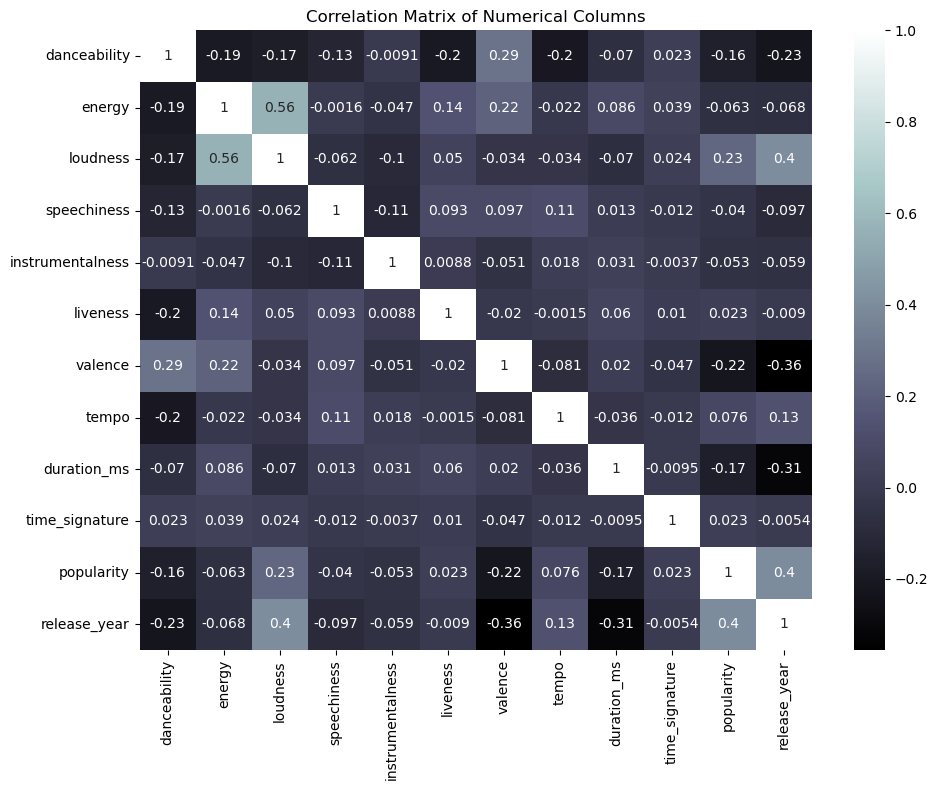

In [22]:
#correlation matrix
corr = songs[numerical].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='bone')
plt.title("Correlation Matrix of Numerical Columns")
plt.tight_layout()
plt.savefig('Capstone/Images/heatmap');

We can see some correlations between loudness and energy, popularity and release year, loudness and release year, and popularity and loudness. 

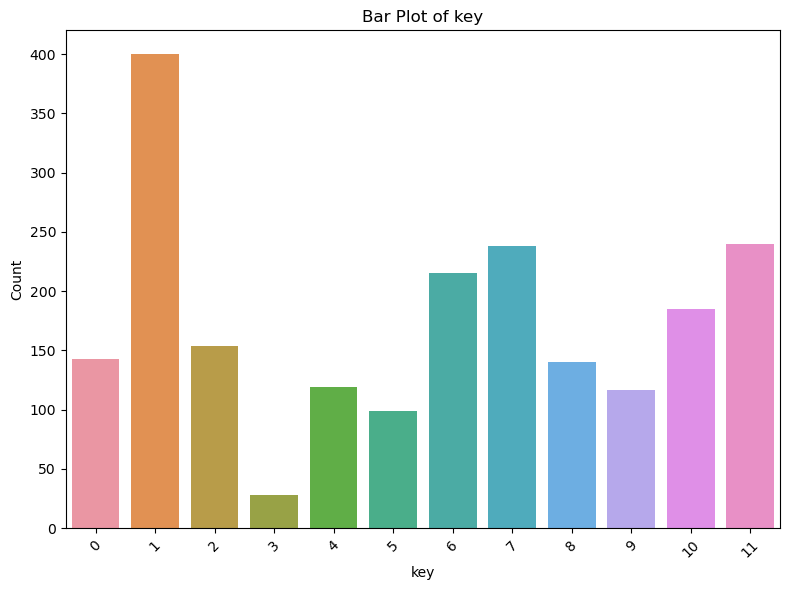

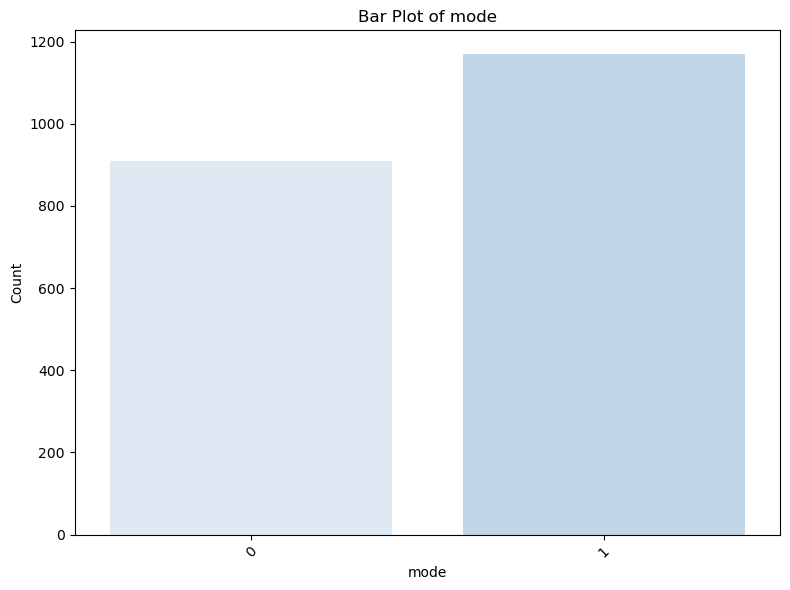

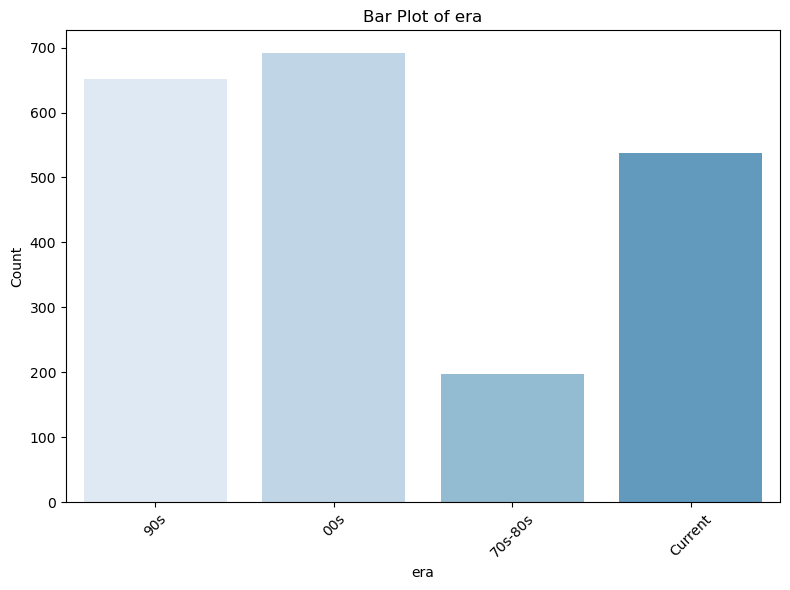

In [23]:
#bar plots for some of the categorical variables
category=['key', 'mode', 'era']
for feature in category:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=songs, x=feature)
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    sns.set_palette('Blues')
    plt.tight_layout()
    plt.savefig(f'Capstone/Images/{feature}_barplot.png');

There are less songs from the 70s abd 80s in the data set but the 90s and 2000s are very well represented. There are more songs that have a mode of 1 than 0 and the most populary key is 1.

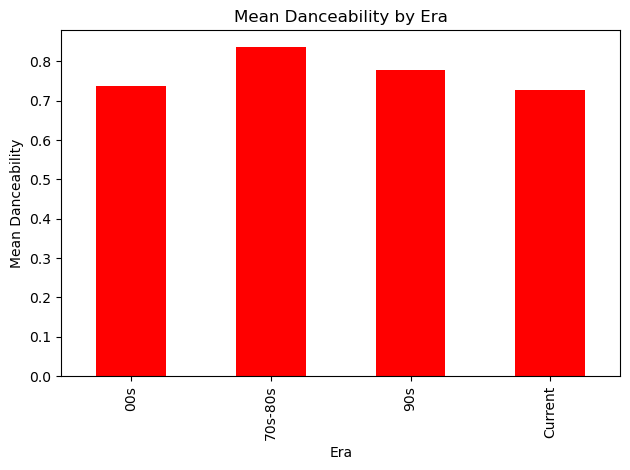

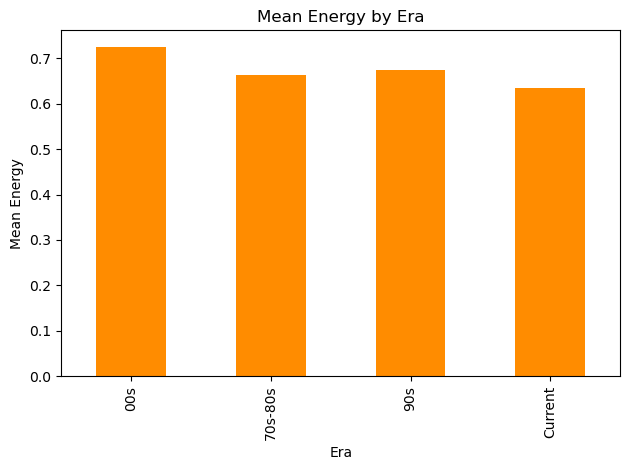

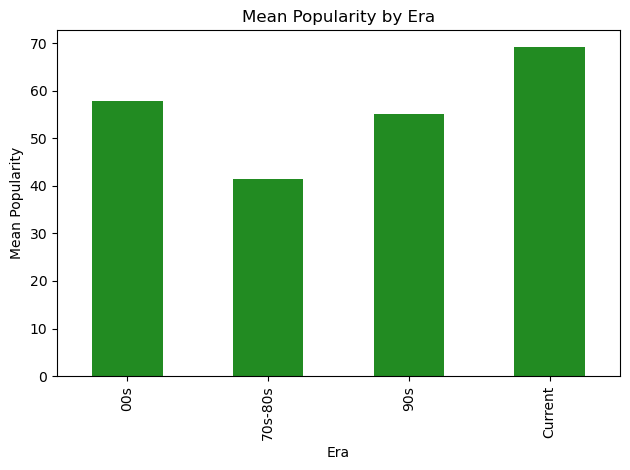

In [24]:
# Group by era
era_stats = songs.groupby('era').mean()

#mean danceability for each era
era_stats['danceability'].plot(kind='bar', color='red')
plt.xlabel('Era')
plt.ylabel('Mean Danceability')
plt.title('Mean Danceability by Era')
plt.tight_layout()
plt.savefig(f'Capstone/Images/dance_barplot.png')
plt.show()


#mean energy for each era
era_stats['energy'].plot(kind='bar', color='darkorange')
plt.xlabel('Era')
plt.ylabel('Mean Energy')
plt.title('Mean Energy by Era')
plt.tight_layout()
plt.savefig(f'Capstone/Images/energy_barplot.png')
plt.show()

#mean popularity for each era
era_stats['popularity'].plot(kind='bar', color='forestgreen')
plt.xlabel('Era')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity by Era')
plt.tight_layout()
plt.savefig(f'Capstone/Images/pop_barplot.png')
plt.show()



Mean danceability was highest in the 70s and 80s which is not surprising. Mean energy was highest in the 2000s and the popularity is highest in the current era with one of the largest conributing factors being that majority of these songs came out during the 'streaming era'.

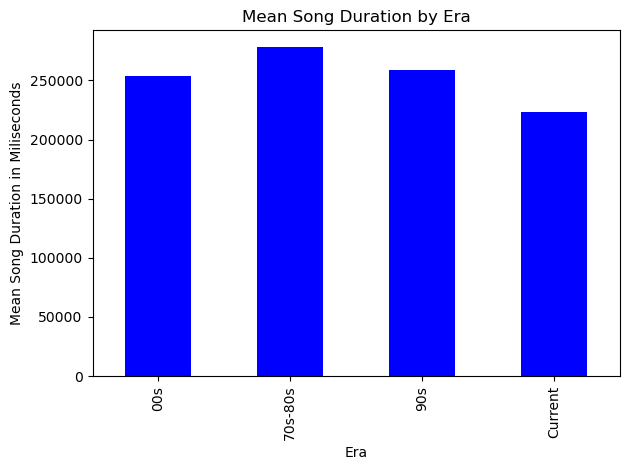

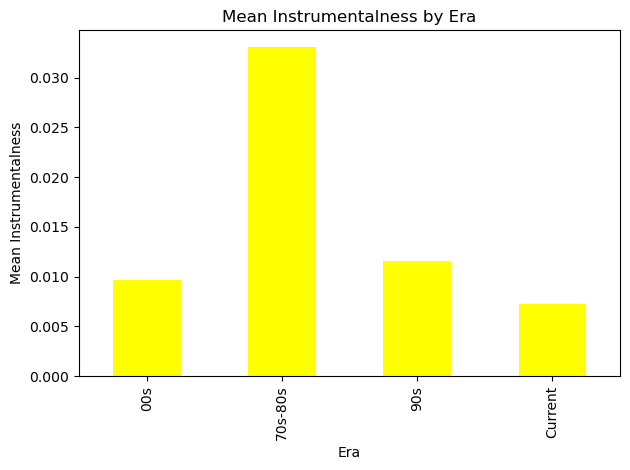

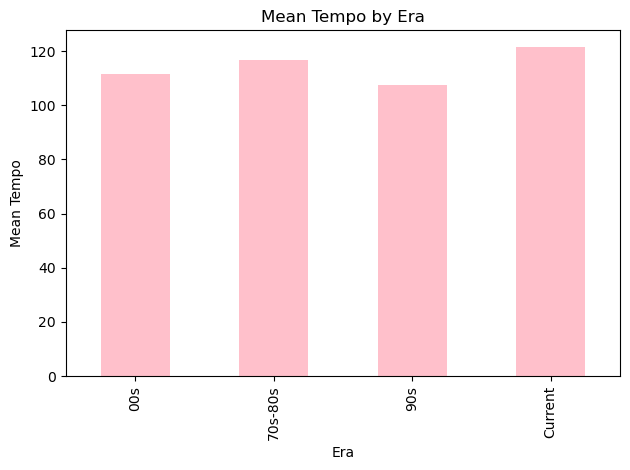

In [25]:
#mean song duration for each era
era_stats['duration_ms'].plot(kind='bar', color='blue')
plt.xlabel('Era')
plt.ylabel('Mean Song Duration in Miliseconds')
plt.title('Mean Song Duration by Era')
plt.tight_layout()
plt.savefig(f'Capstone/Images/duration_barplot.png')
plt.show()

#mean song instrumentalness for each era
era_stats['instrumentalness'].plot(kind='bar', color='yellow')
plt.xlabel('Era')
plt.ylabel('Mean Instrumentalness')
plt.title('Mean Instrumentalness by Era')
plt.tight_layout()
plt.savefig(f'Capstone/Images/instrum_barplot.png')
plt.show()

#mean song tempo for each era
era_stats['tempo'].plot(kind='bar', color='pink')
plt.xlabel('Era')
plt.ylabel('Mean Tempo')
plt.title('Mean Tempo by Era')
plt.tight_layout()
plt.savefig(f'Capstone/Images/tempo_barplot.png')
plt.show()

The mean song duration has been decreasing over time which is not surprising. The mean tempo has been increasing over time and the mean instrumentalness was significantly higher in the 70s and 80s. 

In [26]:
songs.sort_values(by='popularity', ascending=False)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,...,tempo,duration_ms,time_signature,popularity,release_date,artist_id,genres,release_year,region,era
1263,Eminem,The Eminem Show,Without Me,7lQ8MOhq6IN2w8EYcFNSUk,0.908,0.669,7,-2.827,1,0.0738,...,112.238,290320,4,91,2002-05-26,7dGJo4pcD2V6oG8kP0tJRR,"['detroit hip hop', 'hip hop', 'rap']",2002,Midwest,00s
2125,Drake,Her Loss,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,0.561,0.520,11,-9.342,0,0.2440,...,153.150,239360,3,91,2022-11-04,3TVXtAsR1Inumwj472S9r4,"['canadian hip hop', 'canadian pop', 'hip hop'...",2022,Other,Current
1286,Eminem,The Eminem Show,Sing For The Moment,3CpoeW0cZSDzIRv5z34F87,0.668,0.824,5,-4.164,0,0.1370,...,163.961,339547,4,91,2002-05-26,7dGJo4pcD2V6oG8kP0tJRR,"['detroit hip hop', 'hip hop', 'rap']",2002,Midwest,00s
2111,Drake,Her Loss,Circo Loco,7GeTsDIc5ykNB6lORO6Cee,0.734,0.605,1,-8.476,1,0.0699,...,103.976,236795,4,91,2022-11-04,3TVXtAsR1Inumwj472S9r4,"['canadian hip hop', 'canadian pop', 'hip hop'...",2022,Other,Current
1272,Eminem,The Eminem Show,Superman,4woTEX1wYOTGDqNXuavlRC,0.802,0.755,4,-3.138,0,0.0564,...,130.027,350320,4,91,2002-05-26,7dGJo4pcD2V6oG8kP0tJRR,"['detroit hip hop', 'hip hop', 'rap']",2002,Midwest,00s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,Planet Patrol,Planet Patrol,"Play at Your Own Risk - 12"" Version",285d8Zaso5TiA4jTxPiiKu,0.755,0.836,7,-8.065,1,0.0606,...,126.609,467827,4,0,1983-12-13,0roCoWVCD0Qgr0u15TO3dT,"['bass music', 'electro', 'freestyle', 'miami ...",1983,South,70s-80s
2313,Situation,Stand Tough,Stand Tough - Greg Wilson & Derek Kaye Get Ruf...,1BKJMgzhEk3t0PJhhUP0ba,0.438,0.538,2,-7.492,1,0.0535,...,112.011,416250,4,0,2014-01-31,1UnA09CtdmT16mvmzbXnON,[],2014,Other,Current
2307,Snoop Dogg,Me And My Homies,Murder Was the Case,0EDXpRD7o0vRlsQ1EdDakD,0.450,0.697,9,-6.600,1,0.0962,...,91.017,218973,4,0,2005-09-26,7hJcb9fa4alzcOq3EaNPoG,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",2005,West,00s
2306,Doug E. Fresh,The Greatest Hits,Ladi Dadi,3e0oGF1nOr3dDHPdgZhFO5,0.616,0.703,7,-10.545,1,0.6220,...,182.322,268278,4,0,2011-04-28,7xN8vFwslE67EC3DhgB9Ip,"['beatboxing', 'contemporary r&b', 'east coast...",2011,East,Current


The song with the highest popularity score in the dataset is a song by the most streamed rapper on spotify which makes sense. These songs are also about 20 years old so that means they are really really popular.  The songs with the lowest popularity scores are all pretty old(despite the dates). Drake is the 2nd most streamed rapper on the platform and his most popular songs in the dataframe are recent releases. 